# G_2. Tuning parameters of GB (down)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#load the files

X_train = pd.read_csv('../data/x_y_data/re_smote/down_X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/re_smote/down_y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/re_smote/down_X_test.csv')
y_test = pd.read_csv('../data/x_y_data/re_smote/down_y_test.csv')
#data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')

y_train.loc[y_train['churn'] == 'Yes', 'churn'] = 1
y_train.loc[y_train['churn'] == 'No', 'churn'] = 0

y_train['churn'] =y_train['churn'].astype('int64')


y_test.loc[y_test['churn'] == 'Yes', 'churn'] = 1
y_test.loc[y_test['churn'] == 'No', 'churn'] = 0

y_test['churn'] =y_test['churn'].astype('int64')


In [3]:
#set the high-parameter

param_grid = {
    'loss': ['log_loss', 'exponential'],
    'n_estimators': [75, 100, 125,150],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 3, 5],
    'max_depth':[5,10,15],
    'max_features': ['sqrt'] # round(sqrt(#cols))
    }
kappa_scorer = make_scorer(cohen_kappa_score)
gb = GradientBoostingClassifier(random_state=12345)

# make_scorer(error_metric_kappa)
grid_search = GridSearchCV(gb, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 20,  scoring=kappa_scorer)
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.741, test=0.482) total time=   0.7s
[CV 1/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.797, test=0.515) total time=   1.0s
[CV 4/5; 5/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75
[CV 4/5; 5/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 3/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.703, test=0.478) total time=   0.5s
[CV 4/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.715, test=0.542) total time=   0.7s
[CV 2/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 4/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.682, test=0.569) total time=   0.5s
[CV 5/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.735, test=0.495) total time=   0.7s
[CV 3/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.747, test=0.492) total time=   0.7s
[CV 4/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 4/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.746, test=0.548) total time=   0.8s
[CV 2/5; 5/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75
[CV 2/5; 5/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.728, test=0.518) total time=   0.7s
[CV 5/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 5/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.766, test=0.488) total time=   0.8s
[CV 3/5; 5/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75
[CV 3/5; 5/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 5/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.707, test=0.515) total time=   0.5s
[CV 1/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.766, test=0.508) total time=   0.8s
[CV 4/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 1/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.695, test=0.522) total time=   0.5s
[CV 2/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 2/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.778, test=0.492) total time=   0.9s
[CV 1/5; 5/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75
[CV 1/5; 5/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=7

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 2/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.720, test=0.488) total time=   0.5s
[CV 3/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.766, test=0.485) total time=   0.8s
[CV 5/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 71/288] END criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125;, score=(train=0.997, test=0.428) total time=   4.6s
[CV 1/5; 73/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 1/5; 73/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.674, test=0.528) total time=   0.7s
[CV 2/5; 73/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 2/5; 73/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.691, test=0.498) total time=   0.7s
[CV 4/5; 73/288] START criterion=friedman_mse, loss=exponential, max_depth=5, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des


[CV 5/5; 71/288] START criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125
[CV 5/5; 71/288] END criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125;, score=(train=0.998, test=0.448) total time=   4.6s
[CV 5/5; 73/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 5/5; 73/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.682, test=0.522) total time=   0.7s
[CV 3/5; 74/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 74/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_s

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 75/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.741, test=0.532) total time=   1.3s
[CV 2/5; 76/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 76/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.777, test=0.478) total time=   1.8s
[CV 1/5; 78/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 1/5; 78/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.714, test=0.532) total time=   1.5s
[CV 4/5; 79/288] START criterion=friedman_mse, loss=exponential, max_dep

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 77/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75;, score=(train=0.687, test=0.512) total time=   1.2s
[CV 3/5; 79/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125
[CV 3/5; 79/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125;, score=(train=0.736, test=0.452) total time=   1.5s
[CV 1/5; 81/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=75
[CV 1/5; 81/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=75;, score=(train=0.674, test=0.548) total time=   0.9s
[CV 5/5; 81/288] START criterion=friedman_mse, loss=exponential, max_depth=

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 78/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.713, test=0.569) total time=   1.2s
[CV 2/5; 80/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 2/5; 80/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=(train=0.778, test=0.478) total time=   1.8s
[CV 1/5; 82/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 1/5; 82/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.705, test=0.535) total time=   2.7s
[CV 4/5; 83/288] START criterion=friedman_mse, loss=exponential, max_dep

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 77/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75;, score=(train=0.672, test=0.478) total time=   1.0s
[CV 3/5; 78/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 3/5; 78/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.707, test=0.458) total time=   1.4s
[CV 1/5; 80/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 1/5; 80/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=(train=0.768, test=0.518) total time=   1.8s
[CV 4/5; 81/288] START criterion=friedman_mse, loss=exponential, max_dept

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 142/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.995, test=0.435) total time=   3.6s
[CV 5/5; 143/288] START criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125
[CV 5/5; 143/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125;, score=(train=0.998, test=0.438) total time=   4.5s
[CV 1/5; 146/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 146/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.736, test=0.538) total time=   0.8s
[CV 4/5; 146/288] START criterion=squared_error, loss=log_loss, max_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 138/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.997, test=0.462) total time=   4.2s
[CV 3/5; 140/288] START criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150
[CV 3/5; 140/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=(train=0.997, test=0.401) total time=   5.4s
[CV 1/5; 142/288] START criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 1/5; 142/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.994, test=0.455) total time=   3.6s
[CV 4/5; 143/288] START criterion=friedman_mse, loss=exponenti

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 145/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.703, test=0.478) total time=   0.6s
[CV 5/5; 145/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 5/5; 145/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.708, test=0.528) total time=   0.6s
[CV 3/5; 146/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 146/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.741, test=0.482) total time=   0.8s
[CV 3/5; 147/288] START criterion=squared_error, loss=log_loss, max_depth=5, max

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 144/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=(train=0.997, test=0.411) total time=   5.2s
[CV 1/5; 148/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 148/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.797, test=0.512) total time=   1.3s
[CV 4/5; 149/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75
[CV 4/5; 149/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75;, score=(train=0.701, test=0.569) total time=   0.7s
[CV 1/5; 151/288] START criterion=squared_error, loss=log_loss, max_depth=5,

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 147/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.773, test=0.525) total time=   1.0s
[CV 2/5; 148/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 148/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.802, test=0.485) total time=   1.2s
[CV 5/5; 149/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75
[CV 5/5; 149/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75;, score=(train=0.704, test=0.508) total time=   0.7s
[CV 2/5; 151/288] START criterion=squared_error, loss=log_loss, max_depth=5, ma

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 149/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75;, score=(train=0.702, test=0.472) total time=   0.6s
[CV 5/5; 150/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 5/5; 150/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.739, test=0.508) total time=   0.8s
[CV 3/5; 152/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 3/5; 152/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=(train=0.798, test=0.472) total time=   1.2s
[CV 2/5; 154/288] START criterion=squared_error, loss=log_loss, max_depth=5, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 150/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.735, test=0.548) total time=   0.8s
[CV 2/5; 152/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 2/5; 152/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=(train=0.798, test=0.485) total time=   1.2s
[CV 1/5; 154/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 1/5; 154/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.719, test=0.522) total time=   0.9s
[CV 4/5; 155/288] START criterion=squared_error, loss=log_loss, max_depth=5, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 153/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=75;, score=(train=0.702, test=0.505) total time=   0.7s
[CV 3/5; 154/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 3/5; 154/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.727, test=0.482) total time=   0.9s
[CV 1/5; 156/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150
[CV 1/5; 156/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.786, test=0.532) total time=   1.5s
[CV 5/5; 157/288] START criterion=squared_error, loss=log_loss, max_depth=5, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

{'criterion': 'squared_error',
 'loss': 'exponential',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 75}

[CV 5/5; 206/288] END criterion=squared_error, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=(train=0.998, test=0.452) total time=   5.6s
[CV 3/5; 208/288] START criterion=squared_error, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150
[CV 3/5; 208/288] END criterion=squared_error, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150;, score=(train=0.997, test=0.421) total time=  10.0s
[CV 3/5; 210/288] START criterion=squared_error, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 3/5; 210/288] END criterion=squared_error, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.995, test=0.408) total time=   3.6s
[CV 1/5; 212/288] START criterion=squared_error, loss=log_loss, max_dept

In [4]:
grid_search.best_params_

{'criterion': 'squared_error',
 'loss': 'exponential',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 75}

The parameter: {'criterion': 'squared_error',
 'loss': 'exponential',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 75} was chosen.

####  Cross validation socre - Kappa-

In [5]:
gb1= GradientBoostingClassifier(criterion = 'squared_error',
 loss= 'exponential',
 max_depth= 5,
 max_features= 'sqrt',
 min_samples_leaf= 3,
 min_samples_split= 2,
 n_estimators= 75)
kappa_scorer = make_scorer(cohen_kappa_score)
results = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results = cross_val_score(gb1, X_train, y_train, cv=kfold, scoring=kappa_scorer)

results.append(cv_results)
    
msg = f" GB: {cv_results.mean()} ({cv_results.std()})"
print(msg)

 GB: 0.0 (0.0)


In [6]:
#save the model
gb1.fit(X_train, y_train)

filename = "../models/re_down_gb.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(gb1,file)

### Variable Importance 

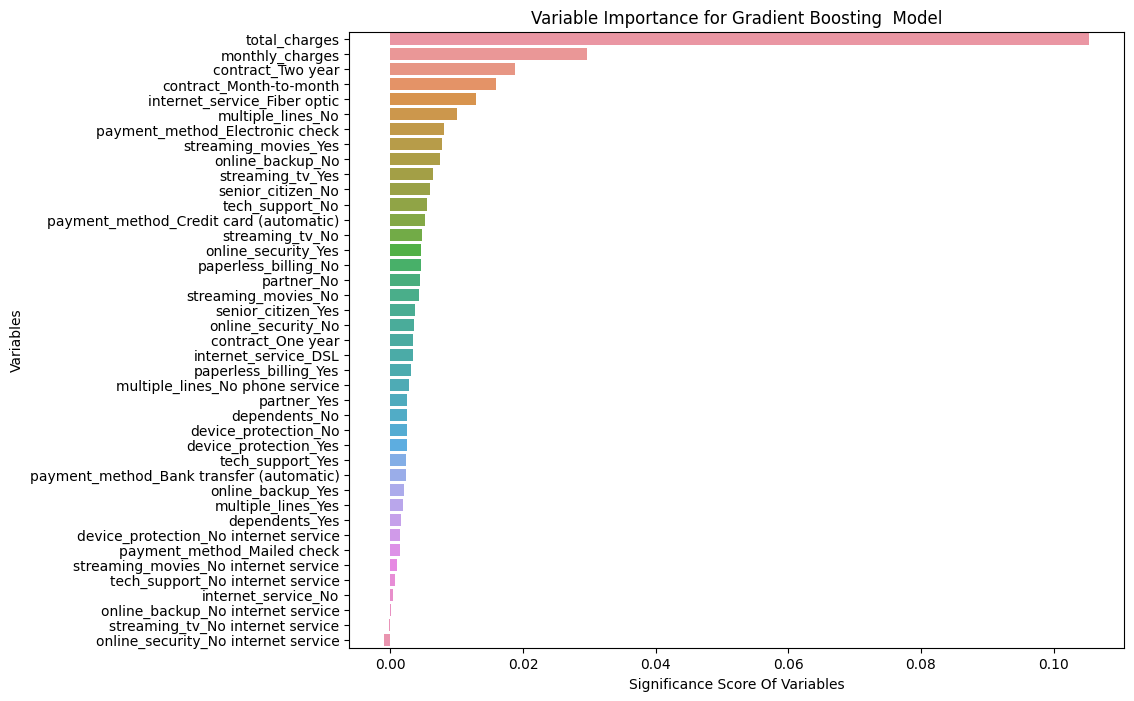

In [7]:
X_train2 = X_train.copy()
y_train2 = y_train.copy()


gb_tuned = gb1.fit(X_train2, y_train2)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(gb_tuned, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8)) 
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Gradient Boosting  Model")
plt.show()


In [8]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df.head(2)

,Significance Score
total_charges,0.105318
monthly_charges,0.029699


In [9]:
feature_importances_df.T

,total_charges,monthly_charges,contract_Two year,contract_Month-to-month,internet_service_Fiber optic,multiple_lines_No,payment_method_Electronic check,streaming_movies_Yes,online_backup_No,streaming_tv_Yes,...,multiple_lines_Yes,dependents_Yes,device_protection_No internet service,payment_method_Mailed check,streaming_movies_No internet service,tech_support_No internet service,internet_service_No,online_backup_No internet service,streaming_tv_No internet service,online_security_No internet service
Significance Score,0.105318,0.029699,0.018729,0.015953,0.012977,0.010067,0.008094,0.007726,0.007458,0.006355,...,0.001906,0.001538,0.001505,0.001505,0.00107,0.000669,0.000468,0.000033,-0.000134,-0.000903


In [10]:
feature_importances_df.T.to_csv('../data/Significant_Score/re_down_GB_Significance_Score.csv', index=False)

### the classification report

In [11]:
from sklearn.metrics import confusion_matrix


y_pred = gb1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[736, 297],
       [ 82, 292]])

In [12]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    818
1    589
Name: count, dtype: int64

In [13]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

churn
0        1033
1         374
Name: count, dtype: int64

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = gb1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.730633
1,Precision,0.495756
2,Recall,0.780749
3,F1-Score,0.606438
4,Kappa,0.416808


In [15]:
metrics_df.to_csv('../data/metrics/re_down_gb_metrics.csv', index=False)